### Problem Set 3, Exercise 4


#### 4 (a)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def matrix_factorization1(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    error_list = []
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P, Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        error_list.append(e)
        if e < 0.001:
            break
    return P, Q.T, error_list 

In [18]:
# Utility matrix from Lecture 4
R = [
    [1, 0, 3, 0, 0, 5, 0, 0, 5, 0, 4, 0],
    [0, 0, 5, 4, 0, 0, 4, 0, 0, 2, 1, 3],
    [2, 4, 0, 1, 2, 0, 3, 0, 4, 3, 5, 0],
    [0, 2, 4, 0, 5, 0, 0, 4, 0, 0, 2, 0],
    [0, 0, 4, 3, 4, 2, 0, 0, 0, 0, 2, 5],
    [1, 0, 3, 0, 3, 0, 0, 2, 0, 0, 4, 0],
]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 3

P = np.random.rand(N, K)
Q = np.random.rand(M, K)

nP, nQ, error_list = matrix_factorization1(R, P, Q, K)

In [19]:
print("Matrix P:")
print(np.round(nQ, 1))

Matrix P:
[[ 0.7  0.1 -0.3]
 [ 1.2  1.  -0. ]
 [ 0.3  0.9  1.9]
 [ 0.3  0.8  1.5]
 [ 1.   0.4  1.8]
 [ 1.6  1.  -0.1]
 [ 0.9  1.2  1.2]
 [ 0.9  0.   1.4]
 [ 1.3  1.3  0.9]
 [ 1.2  0.5  0.6]
 [ 1.4  1.2 -0.2]
 [ 2.5  1.1  0.8]]


In [20]:
print("\nMatrix Q:")
print(np.round(nP, 1))


Matrix Q:
[[ 2.1  1.3  0.7]
 [ 0.1  1.   2.1]
 [ 2.3  1.3 -0.5]
 [ 1.6  0.2  1.8]
 [ 1.1  0.6  1.6]
 [ 1.5  1.7  0.5]]


##### No, the matrices P and Q obtained here do not match those shown in Lecture 3. This difference is primarily due to the random initialization of P and Q matrices before starting the gradient descent process.

In [21]:
nR = np.dot(nP, nQ.T)

print("\nPredicted Matrix R (dot product of Q and P.T):")
print(np.round(nR, 1))


Predicted Matrix R (dot product of Q and P.T):
[[ 1.3  3.7  3.1  2.5  3.7  4.7  4.2  2.8  4.9  3.4  4.3  7. ]
 [-0.5  1.1  4.9  3.9  4.3  1.1  4.   3.2  3.5  2.   0.9  3.2]
 [ 1.8  4.   1.1  1.   2.   5.2  3.   1.4  4.1  3.   4.8  6.7]
 [ 0.4  2.   4.1  3.3  4.9  2.6  3.9  4.   4.   3.   2.   5.5]
 [ 0.3  1.9  3.9  3.1  4.1  2.4  3.7  3.2  3.7  2.6  2.   4.7]
 [ 1.   3.4  2.9  2.4  3.   4.2  3.9  2.   4.5  2.9  3.9  5.9]]


#### 4(b)

##### Plot the error over iterations

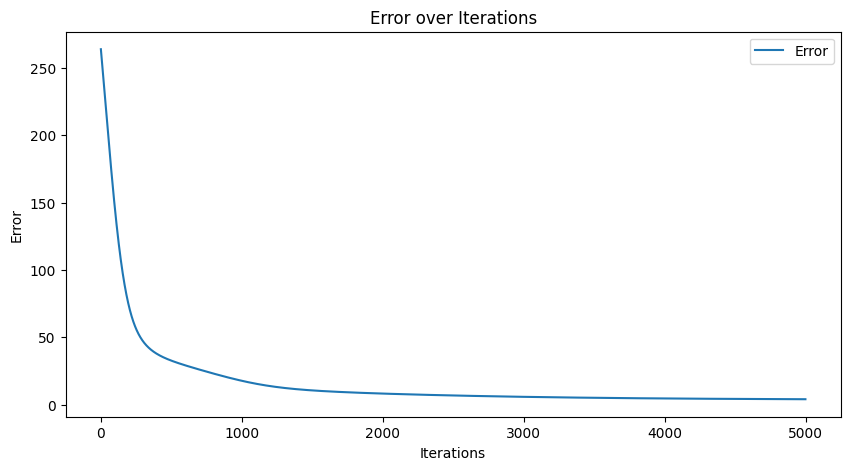

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(error_list, label='Error')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error over Iterations')
plt.legend()
plt.show()

##### Plot the differences in the error

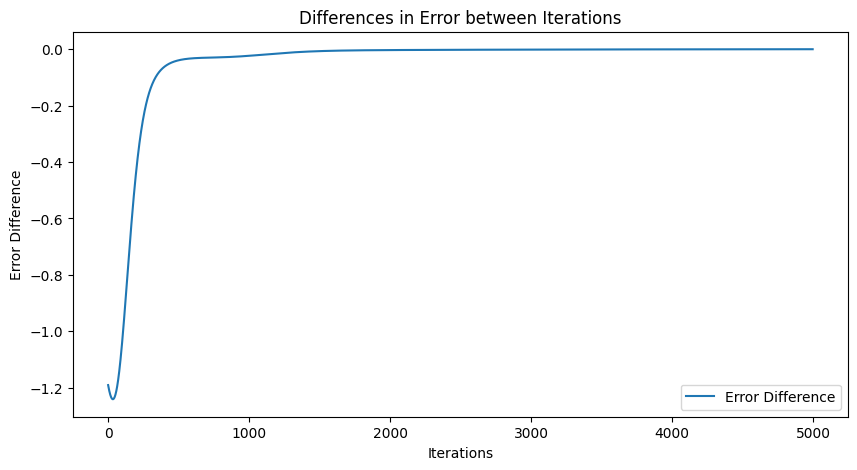

In [23]:
error_diff = [error_list[i + 1] - error_list[i] for i in range(len(error_list) - 1)]
plt.figure(figsize=(10, 5))
plt.plot(error_diff, label='Error Difference')
plt.xlabel('Iterations')
plt.ylabel('Error Difference')
plt.title('Differences in Error between Iterations')
plt.legend()
plt.show()

#### 4 (c)

To speed up the convergence, one option is to adaptively adjust the learning rate 𝛼 during the training process

### Idea Behind Adaptive Learning Rate for Matrix Factorization

In the matrix factorization problem, the learning rate 𝛼 controls the step size in the gradient descent algorithm. A fixed learning rate can be inefficient, as it might converge too slowly at the beginning, or it may overshoot the optimal solution as the algorithm gets closer to it.

#### Exponential Decay Learning Rate
To address this, we can use an **adaptive learning rate**. One common approach is **exponential decay** where the learning rate decreases over time, allowing the algorithm to take large steps initially and smaller, more precise steps as it gets closer to the optimal solution. The formula for exponential decay is:

α_new
​
 =α_0
​
 ⋅exp(−λ⋅iteration)

Where:
- α_0 is the initial learning rate.
- λ controls the rate of decay.
- `iteration` is the current step number.

This method allows faster convergence during early stages and more fine-tuned adjustments in later stages.


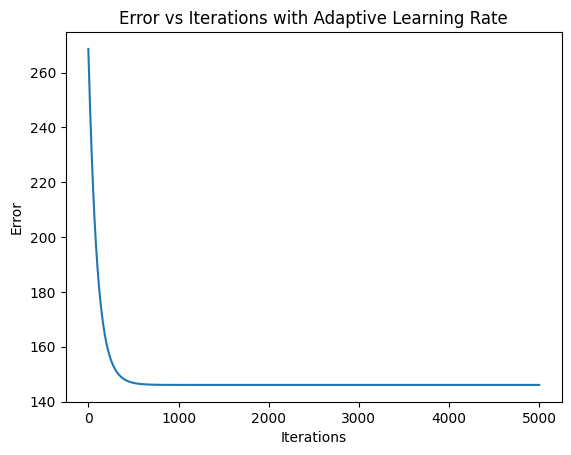

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def matrix_factorization_with_adaptive_lr(R, P, Q, K, steps=5000, alpha_0=0.0002, beta=0.02, decay_lambda=0.01):
    Q = Q.T
    error_list = []
    for step in range(steps):
        alpha = alpha_0 * np.exp(-decay_lambda * step)
        
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[:, j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        
        eR = np.dot(P, Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i, :], Q[:, j]), 2)
                    for k in range(K):
                        e = e + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
        
        error_list.append(e)
        
        if e < 0.001:
            break
    
    return P, Q.T, error_list


R = [
    [1, 0, 3, 0, 0, 5, 0, 0, 5, 0, 4, 0],
    [0, 0, 5, 4, 0, 0, 4, 0, 0, 2, 1, 3],
    [2, 4, 0, 1, 2, 0, 3, 0, 4, 3, 5, 0],
    [0, 2, 4, 0, 5, 0, 0, 4, 0, 0, 2, 0],
    [0, 0, 4, 3, 4, 2, 0, 0, 0, 0, 2, 5],
    [1, 0, 3, 0, 3, 0, 0, 2, 0, 0, 4, 0],
]

R = np.array(R)

N = len(R)
M = len(R[0])
K = 3

P = np.random.rand(N, K)
Q = np.random.rand(M, K)

nP, nQ, error_list = matrix_factorization_with_adaptive_lr(R, P, Q, K)

nR = np.dot(nP, nQ.T)

plt.plot(range(len(error_list)), error_list)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error vs Iterations with Adaptive Learning Rate')
plt.show()
